In [78]:
import pandas as pd

df = pd.read_parquet("/Users/ganeshjai/Documents/SpotifyML/data/raw/liked_songs.parquet")   # or .csv
df.head()


,snapshot_utc,added_at,track_id,track_name,explicit,popularity,duration_ms,artist_names,artist_ids,album_id,album_name,release_date,release_date_precision
0,2025-12-19T22:56:19.432269+00:00,2025-12-19T01:08:22Z,1De425SCFJULIHbcmeebUw,LET THE WORLD BURN,False,84,163290,Chris Grey,0F3maSKfGGVtfATaAyeyPG,5QytORVSwlSBhDtikzvcV5,LET THE WORLD BURN,2024-03-08,day
1,2025-12-19T22:56:19.432269+00:00,2025-12-18T19:53:59Z,6ywlVHMUgoYERzPUJeoF2q,Disparate Youth,False,37,284400,Santigold,6Jrxnp0JgqmeUX1veU591p,4lFjB2ykrjXeFeONc0iJUD,Alternative Music - Hits,2024-07-18,day
2,2025-12-19T22:56:19.432269+00:00,2025-12-18T06:35:22Z,50NJA7Ds65risvAXLspiWK,PTSD,True,59,129200,Nemzzz,3DHtfeD4PsmR9YGhCP4VF7,6VUAEJ53jti8LKTEKGydaS,PTSD,2024-02-22,day
3,2025-12-19T22:56:19.432269+00:00,2025-12-17T23:27:38Z,5ngKfcia7Xyjr4kYv97dbJ,LET THE WORLD BURN - TikTok Guitar Cover x Hoo...,False,75,66874,R3BEL|Joshua Guitar|Kryd,1XnhbRQMaWskCBCaDLoOJR|7CtuMMkP4fCC7SGiviyHiN|...,2YPtNZDNczAFgnLYmtJOGI,LET THE WORLD BURN (TikTok Guitar Cover x Hood...,2025-10-23,day
4,2025-12-19T22:56:19.432269+00:00,2025-12-17T05:50:38Z,4evMMKc2HD6fV9slMfgkMx,TOXIC (with Skepta),True,83,135275,Playboi Carti|Skepta,699OTQXzgjhIYAHMy9RyPD|2p1fiYHYiXz9qi0JJyxBzN,0fSfkmx0tdPqFYkJuNX74a,MUSIC,2025-03-14,day


In [79]:
df.shape



(1000, 13)

In [80]:
df.columns


Index(['snapshot_utc', 'added_at', 'track_id', 'track_name', 'explicit',
       'popularity', 'duration_ms', 'artist_names', 'artist_ids', 'album_id',
       'album_name', 'release_date', 'release_date_precision'],
      dtype='object')

In [81]:
df.dtypes


snapshot_utc              object
added_at                  object
track_id                  object
track_name                object
explicit                    bool
popularity                 int64
duration_ms                int64
artist_names              object
artist_ids                object
album_id                  object
album_name                object
release_date              object
release_date_precision    object
dtype: object

In [82]:
df.isna().mean().sort_values(ascending=False).head(15)


snapshot_utc              0.0
added_at                  0.0
track_id                  0.0
track_name                0.0
explicit                  0.0
popularity                0.0
duration_ms               0.0
artist_names              0.0
artist_ids                0.0
album_id                  0.0
album_name                0.0
release_date              0.0
release_date_precision    0.0
dtype: float64

In [83]:
df.nunique().sort_values(ascending=False).head(15)

added_at                  1000
track_id                   994
track_name                 988
duration_ms                978
album_id                   943
album_name                 936
artist_names               867
artist_ids                 867
release_date               759
popularity                  89
explicit                     2
release_date_precision       2
snapshot_utc                 1
dtype: int64

In [84]:
df.info

<bound method DataFrame.info of                          snapshot_utc              added_at  \
0    2025-12-19T22:56:19.432269+00:00  2025-12-19T01:08:22Z   
1    2025-12-19T22:56:19.432269+00:00  2025-12-18T19:53:59Z   
2    2025-12-19T22:56:19.432269+00:00  2025-12-18T06:35:22Z   
3    2025-12-19T22:56:19.432269+00:00  2025-12-17T23:27:38Z   
4    2025-12-19T22:56:19.432269+00:00  2025-12-17T05:50:38Z   
..                                ...                   ...   
995  2025-12-19T22:56:19.432269+00:00  2022-11-15T22:39:17Z   
996  2025-12-19T22:56:19.432269+00:00  2022-11-15T22:35:19Z   
997  2025-12-19T22:56:19.432269+00:00  2022-11-15T00:26:49Z   
998  2025-12-19T22:56:19.432269+00:00  2022-11-14T16:16:30Z   
999  2025-12-19T22:56:19.432269+00:00  2022-11-14T02:53:10Z   

                   track_id  \
0    1De425SCFJULIHbcmeebUw   
1    6ywlVHMUgoYERzPUJeoF2q   
2    50NJA7Ds65risvAXLspiWK   
3    5ngKfcia7Xyjr4kYv97dbJ   
4    4evMMKc2HD6fV9slMfgkMx   
..                      .

In [85]:
artist_counts = (
    df.assign(artist=df["artist_names"].str.split(r"\|"))
      .explode("artist")
      .dropna(subset=["artist"])
      .groupby("artist")["track_id"].count()
      .sort_values(ascending=False)
)
artist_counts.head(20)


artist
Pritam               20
Alka Yagnik          15
KK                   12
Udit Narayan          9
Shreya Ghoshal        9
Atif Aslam            9
Sayeed Quadri         8
Himesh Reshammiya     8
Peggy Gou             7
A.R. Rahman           7
Asha Bhosle           7
Arijit Singh          7
Mithoon               7
Diljit Dosanjh        7
Kishore Kumar         7
Kumar Sanu            7
Javed Akhtar          6
Sunidhi Chauhan       6
Sade                  6
Brutalismus 3000      5
Name: track_id, dtype: int64

In [86]:
df["popularity"].describe()


count    1000.000000
mean       47.831000
std        22.485018
min         0.000000
25%        35.000000
50%        52.000000
75%        65.000000
max        88.000000
Name: popularity, dtype: float64

In [87]:
df["added_at_dt"] = pd.to_datetime(df["added_at"], errors="coerce", utc=True)
df["added_date"] = df["added_at_dt"].dt.date
df["added_month"] = df["added_at_dt"].dt.to_period("M").astype(str)


/var/folders/gd/fqns64vx2d97sm14r8y1n9lr0000gn/T/ipykernel_11366/3493077217.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["added_month"] = df["added_at_dt"].dt.to_period("M").astype(str)


In [88]:
df.groupby("added_month")["track_id"].count().tail(24)


added_month
2023-12      7
2024-01      7
2024-02      9
2024-03      1
2024-04     10
2024-05     14
2024-07      8
2024-08      2
2024-09     18
2024-10     13
2024-11     22
2024-12     23
2025-01     41
2025-02     27
2025-03     31
2025-04     84
2025-05     84
2025-06     52
2025-07     65
2025-08     57
2025-09     30
2025-10     66
2025-11    103
2025-12     53
Name: track_id, dtype: int64

In [89]:
import numpy as np

df["title_len"] = df["track_name"].fillna("").str.len()
df["artist_count"] = df["artist_names"].fillna("").str.count(r"\|") + 1
df["is_collab"] = (df["artist_count"] > 1).astype(int)
df["is_explicit"] = df["explicit"].fillna(False).astype(int)

# release year fallback for partial dates:
df["release_year"] = pd.to_numeric(df["release_date"].str.slice(0,4), errors="coerce")
df["track_age_years"] = (pd.Timestamp.utcnow().year - df["release_year"]).clip(lower=0)


In [90]:
df

,snapshot_utc,added_at,track_id,track_name,explicit,popularity,duration_ms,artist_names,artist_ids,album_id,...,release_date_precision,added_at_dt,added_date,added_month,title_len,artist_count,is_collab,is_explicit,release_year,track_age_years
0,2025-12-19T22:56:19.432269+00:00,2025-12-19T01:08:22Z,1De425SCFJULIHbcmeebUw,LET THE WORLD BURN,False,84,163290,Chris Grey,0F3maSKfGGVtfATaAyeyPG,5QytORVSwlSBhDtikzvcV5,...,day,2025-12-19 01:08:22+00:00,2025-12-19,2025-12,18,1,0,0,2024,1
1,2025-12-19T22:56:19.432269+00:00,2025-12-18T19:53:59Z,6ywlVHMUgoYERzPUJeoF2q,Disparate Youth,False,37,284400,Santigold,6Jrxnp0JgqmeUX1veU591p,4lFjB2ykrjXeFeONc0iJUD,...,day,2025-12-18 19:53:59+00:00,2025-12-18,2025-12,15,1,0,0,2024,1
2,2025-12-19T22:56:19.432269+00:00,2025-12-18T06:35:22Z,50NJA7Ds65risvAXLspiWK,PTSD,True,59,129200,Nemzzz,3DHtfeD4PsmR9YGhCP4VF7,6VUAEJ53jti8LKTEKGydaS,...,day,2025-12-18 06:35:22+00:00,2025-12-18,2025-12,4,1,0,1,2024,1
3,2025-12-19T22:56:19.432269+00:00,2025-12-17T23:27:38Z,5ngKfcia7Xyjr4kYv97dbJ,LET THE WORLD BURN - TikTok Guitar Cover x Hoo...,False,75,66874,R3BEL|Joshua Guitar|Kryd,1XnhbRQMaWskCBCaDLoOJR|7CtuMMkP4fCC7SGiviyHiN|...,2YPtNZDNczAFgnLYmtJOGI,...,day,2025-12-17 23:27:38+00:00,2025-12-17,2025-12,58,3,1,0,2025,0
4,2025-12-19T22:56:19.432269+00:00,2025-12-17T05:50:38Z,4evMMKc2HD6fV9slMfgkMx,TOXIC (with Skepta),True,83,135275,Playboi Carti|Skepta,699OTQXzgjhIYAHMy9RyPD|2p1fiYHYiXz9qi0JJyxBzN,0fSfkmx0tdPqFYkJuNX74a,...,day,2025-12-17 05:50:38+00:00,2025-12-17,2025-12,19,2,1,1,2025,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2025-12-19T22:56:19.432269+00:00,2022-11-15T22:39:17Z,7wKzAVpepfbftHnSYBQ0Ac,誘惑,False,7,282306,Yoko Hatanaka,1Dhw0Yx6XuEeR1Wrc9ejXF,1BXCeD0BrsHhX2zQg5sxkH,...,day,2022-11-15 22:39:17+00:00,2022-11-15,2022-11,2,1,0,0,2014,11
996,2025-12-19T22:56:19.432269+00:00,2022-11-15T22:35:19Z,36DXn2RwWPNatEvSeD1KL7,PASSION,False,0,185426,Yu Hayami,1EgJAueSbwh56nECF6YQHX,1i0dbsmZYyqNNVBQshmmqH,...,day,2022-11-15 22:35:19+00:00,2022-11-15,2022-11,7,1,0,0,2017,8
997,2025-12-19T22:56:19.432269+00:00,2022-11-15T00:26:49Z,7ohR0qPH6f2Vuj2pUNanJG,Got To Give It Up - Pt. 1,False,69,255133,Marvin Gaye,3koiLjNrgRTNbOwViDipeA,4JdEAA9aYadM2pZ96VHKNL,...,day,2022-11-15 00:26:49+00:00,2022-11-15,2022-11,25,1,0,0,1983,42
998,2025-12-19T22:56:19.432269+00:00,2022-11-14T16:16:30Z,1bijLgFny9qXVxnu0dOXTB,I Am Reborn,False,17,202092,Asmodai,6PHDOUfabIXQ4lb9PXg4Yz,3qsYXeXfoLT84C3OtwVngq,...,day,2022-11-14 16:16:30+00:00,2022-11-14,2022-11,11,1,0,0,2018,7


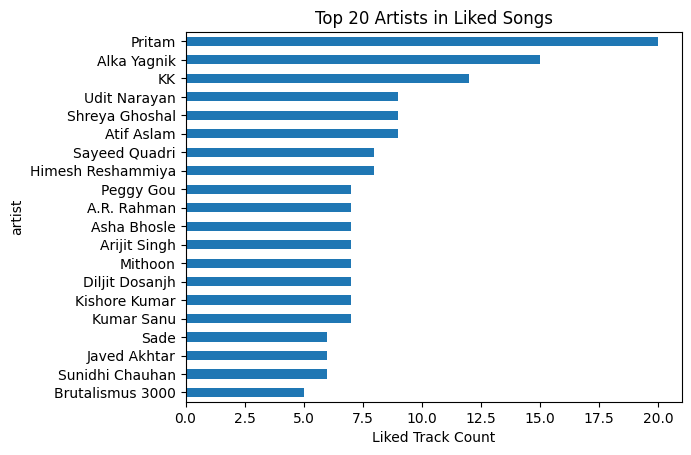

In [91]:
import matplotlib.pyplot as plt

top20 = artist_counts.head(20).sort_values()
top20.plot(kind="barh")
plt.title("Top 20 Artists in Liked Songs")
plt.xlabel("Liked Track Count")
plt.show()


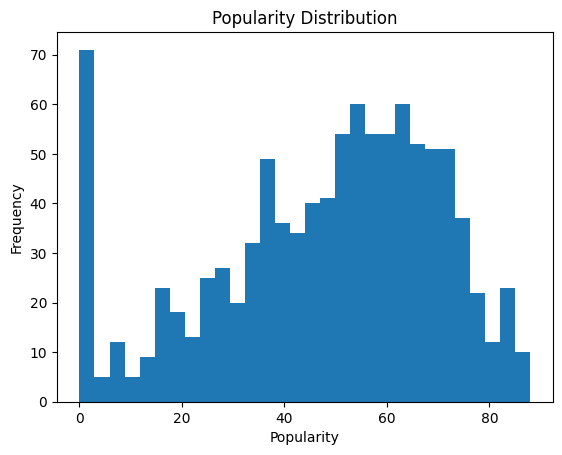

In [92]:
df["popularity"].dropna().plot(kind="hist", bins=30)
plt.title("Popularity Distribution")
plt.xlabel("Popularity")
plt.show()


In [93]:
import time
import pandas as pd
import requests
from tqdm.auto import tqdm

def chunked(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i+n]

def _extract_list(payload):
    """
    ReccoBeats sometimes wraps results in a dict with a list under keys like:
    'data' or 'content' (and sometimes others). This normalizes it to a list.
    """
    if isinstance(payload, list):
        return payload

    if isinstance(payload, dict):
        for key in ["data", "content", "items", "results", "audio_features"]:
            val = payload.get(key)
            if isinstance(val, list):
                return val
        # If it’s a dict but not list-wrapped, return empty list (avoid extending keys)
        return []

    return []

def reccobeats_audio_features_batch(spotify_track_ids, chunk_size=40, sleep=0.05):
    session = requests.Session()
    rows = []

    for chunk in tqdm(list(chunked(list(spotify_track_ids), chunk_size)), desc="ReccoBeats /audio-features"):
        params = [("ids", tid) for tid in chunk]  # <=40 ids
        r = session.get(
            "https://api.reccobeats.com/v1/audio-features",
            params=params,
            headers={"accept": "application/json"},
            timeout=30,
        )

        if r.status_code == 200:
            payload = r.json()
            feats = _extract_list(payload)
            if feats:
                rows.extend(feats)
        else:
            print("failed:", r.status_code, r.text[:200])

        time.sleep(sleep)

    return pd.DataFrame(rows)


In [94]:
spotify_ids = df["track_id"].dropna().unique().tolist()
audio_df = reccobeats_audio_features_batch(spotify_ids, chunk_size=40)
audio_df.shape, audio_df.head()


ReccoBeats /audio-features: 100%|██████████| 25/25 [00:12<00:00,  2.08it/s]


((848, 14),
                                      id  \
 0  fb09fea9-0cfa-4cdf-817c-8fcdd9b79023   
 1  abb15fa1-9882-4a93-9d11-87df5fe5c30d   
 2  4a27dc07-fc55-447d-88c7-69dc105eedb2   
 3  417bced4-5db7-4e8e-a3a4-5b665d1e2994   
 4  2b68076b-3063-492b-adec-6b80680cb230   
 
                                                 href          isrc  \
 0  https://open.spotify.com/track/69Z9CGFvblV0qTb...  FR57F8500690   
 1  https://open.spotify.com/track/2V875q2TKxJrT3j...  USUM72305813   
 2  https://open.spotify.com/track/6N2rMGXBhNZ6slx...  TCAEX2014198   
 3  https://open.spotify.com/track/3zNNXjjjeLrzIXS...  SEVUM1100103   
 4  https://open.spotify.com/track/6ryPKHgiz6MSGJ1...  USNRS2241987   
 
    acousticness  danceability  energy  instrumentalness  key  liveness  \
 0       0.00369         0.797   0.650           0.89200    0    0.2000   
 1       0.00192         0.797   0.592           0.00000    8    0.1400   
 2       0.02860         0.693   0.916           0.66600    1    0.30

In [95]:
audio_df = audio_df.copy()
audio_df["track_id"] = audio_df["href"].str.split("/track/").str[-1].str.split("?").str[0]

audio_df[["track_id","danceability","energy","tempo","valence"]]


,track_id,danceability,energy,tempo,valence
0,69Z9CGFvblV0qTb6wMoCpP,0.797,0.650,102.414,0.9540
1,2V875q2TKxJrT3jR4TyKEE,0.797,0.592,128.098,0.4250
2,6N2rMGXBhNZ6slxJcp1E7z,0.693,0.916,144.044,0.7230
3,3zNNXjjjeLrzIXSJZKalDi,0.785,0.700,122.031,0.2960
4,6ryPKHgiz6MSGJ1wYqn28b,0.776,0.798,127.007,0.4280
...,...,...,...,...,...
843,07LRjvNrvSE311BWlwRptq,0.430,0.747,77.450,0.5350
844,4pNIuvIbrCbq0x8oiiVg8z,0.631,0.758,113.762,0.6200
845,28kFbeS43berzA8BOzBAA0,0.433,0.207,119.883,0.0507
846,3tLapq9zkIVEKbZ7IBlaTI,0.673,0.982,149.986,0.4470


In [96]:
df_audio = df.merge(
    audio_df.drop(columns=["href"], errors="ignore"),
    on="track_id",
    how="left",
    suffixes=("", "_audio")
)

df_audio.shape


(1000, 35)

In [97]:
feature_cols = ["acousticness","danceability","energy","instrumentalness","key","liveness",
                "loudness","mode","speechiness","tempo","valence"]

coverage = df_audio[feature_cols].notna().any(axis=1).mean()
coverage


np.float64(0.853)

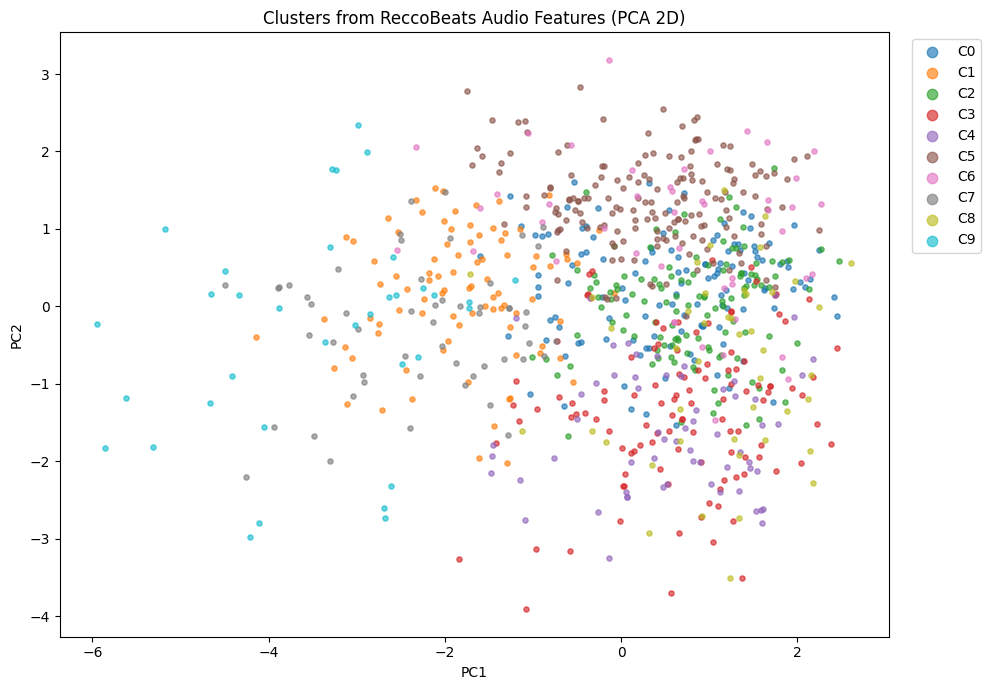

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# keep only rows that have ALL audio features
Xdf = df_audio.dropna(subset=feature_cols).copy()

X = Xdf[feature_cols].values
X = StandardScaler().fit_transform(X)

k = 10  # try 8–15
km = KMeans(n_clusters=k, random_state=42, n_init="auto")
Xdf["cluster_audio"] = km.fit_predict(X)

pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(Xdf[feature_cols].pipe(StandardScaler().fit_transform))
Xdf["x"] = X2[:,0]
Xdf["y"] = X2[:,1]

plt.figure(figsize=(10,7))
for c in sorted(Xdf["cluster_audio"].unique()):
    sub = Xdf[Xdf["cluster_audio"] == c]
    plt.scatter(sub["x"], sub["y"], s=14, alpha=0.65, label=f"C{c}")

plt.title("Clusters from ReccoBeats Audio Features (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(markerscale=2, bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [99]:
cluster_profile = Xdf.groupby("cluster_audio")[feature_cols].mean().round(3)
cluster_profile


,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
cluster_audio,,,,,,,,,,,
0,0.143,0.700,0.723,0.031,4.256,0.140,-7.316,1.000,0.061,113.910,0.645
1,0.627,0.524,0.479,0.026,3.733,0.153,-9.857,0.000,0.048,115.646,0.412
2,0.150,0.573,0.806,0.025,6.447,0.167,-5.758,0.008,0.065,111.516,0.474
3,0.092,0.618,0.790,0.777,4.929,0.166,-7.509,0.558,0.054,124.587,0.428
4,0.082,0.447,0.749,0.086,5.194,0.181,-6.747,0.726,0.073,154.452,0.326
5,0.222,0.751,0.654,0.064,6.006,0.147,-8.470,0.000,0.062,121.327,0.762
6,0.256,0.700,0.657,0.081,5.696,0.172,-8.001,0.457,0.286,120.995,0.575
7,0.694,0.509,0.418,0.029,5.574,0.188,-10.971,1.000,0.049,114.149,0.452
8,0.127,0.591,0.802,0.166,5.045,0.610,-6.619,0.318,0.066,121.583,0.584


In [100]:
for c in sorted(Xdf["cluster_audio"].unique()):
    print(f"\nCluster {c} | n={(Xdf['cluster_audio']==c).sum()}")
    display(Xdf.loc[Xdf["cluster_audio"]==c, ["track_name","artist_names","tempo","energy","danceability","valence"]].head(8))



Cluster 0 | n=121


,track_name,artist_names,tempo,energy,danceability,valence
24,Let's Go,Key Glock,75.486,0.636,0.654,0.267
44,Take Me In Your Arms,Lil Suzy,125.973,0.754,0.774,0.838
47,That's That,Sheff G,140.091,0.589,0.690,0.652
56,5 to 50 (feat. India),Benny The Butcher|INDIA,120.021,0.578,0.790,0.360
61,Test & Recognise (Flume Re-work),Seekae|Flume,109.769,0.581,0.543,0.299
62,HEARD OF MË,Yeat,74.985,0.546,0.554,0.084
65,There She Goes,Babyface,104.993,0.654,0.789,0.830
75,Say Goodbye,LOSTBOYJAY|Billy Raffoul,127.968,0.789,0.748,0.309



Cluster 1 | n=90


,track_name,artist_names,tempo,energy,danceability,valence
20,auditorium - slowed + reverb,bbygirl,80.665,0.334,0.578,0.197
39,Tu Mile Dil Khile - Male Vocals,Kumar Sanu|Indeevar,185.847,0.354,0.609,0.595
41,Chupke Se,A.R. Rahman|Sadhana Sargam|Murtuza|Qadir|Gulzar,103.988,0.350,0.739,0.456
145,Big in Japan,Alphaville,97.646,0.414,0.748,0.240
194,Secret Place,Prem Joshua,147.860,0.637,0.502,0.200
221,Phir Mohabbat,Mohammed Irfan|Arijit Singh|Saim Bhat|Mithoon|...,199.807,0.481,0.461,0.262
223,Con la Misma Piedra,Julio Iglesias,90.456,0.544,0.649,0.529
237,Pal Pal (with Talwiinder),Afusic|Talwiinder|AliSoomroMusic,105.059,0.527,0.730,0.299



Cluster 2 | n=123


,track_name,artist_names,tempo,energy,danceability,valence
0,LET THE WORLD BURN,Chris Grey,92.890,0.557,0.377,0.2480
5,Remember (with Nigo),Pop Smoke|Nigo,134.950,0.744,0.685,0.1670
7,Borderline - Version Three // Slowed Down,yahya,86.904,0.654,0.587,0.3040
18,I Follow Rivers - The Magician Remix,Lykke Li|The Magician,122.031,0.700,0.785,0.2960
22,Hailin From The Edge,Apparat|Raz Ohara,92.020,0.706,0.816,0.5250
52,Rent Free - Slowed,Melly Mike,123.276,0.732,0.711,0.0552
67,"Teri Yaadon Mein (From ""The Killer"")",KK|Shreya Ghoshal,105.059,0.734,0.577,0.3010
77,Waiting for Tonight - Radio Edit,Jennifer Lopez|FISHER,128.988,0.833,0.715,0.6390



Cluster 3 | n=113


,track_name,artist_names,tempo,energy,danceability,valence
1,Disparate Youth,Santigold,152.005,0.931,0.642,0.548
13,starly - Slowed,LONOWN|riserayss,91.504,0.631,0.699,0.168
15,Song for Denise,Piano Fantasia,102.414,0.650,0.797,0.954
17,Da Fonk (feat. Joni),Mochakk|Joni,127.007,0.798,0.776,0.428
23,Meet Her At The Love Parade - Slowed,Vieze Asbak,113.048,0.900,0.934,0.713
26,Heroine,Dutch Disorder,144.044,0.916,0.693,0.723
37,The Lost Soul Down - Slowed & Reverb,NBSPLV,90.041,0.519,0.725,0.351
53,I like the way u talk to me,NESYA,140.226,0.872,0.335,0.372



Cluster 4 | n=62


,track_name,artist_names,tempo,energy,danceability,valence
11,Six Days,DJ Shadow,167.259,0.624,0.524,0.7380
27,Youngest Daughter,Superheaven,129.682,0.762,0.492,0.4130
38,CALL YOU UP (Remix),rghvarchive|Kansh,126.015,0.452,0.432,0.0726
42,"Aoi, Koi, Daidaiiro No Hi",MASS OF THE FERMENTING DREGS,149.039,0.932,0.450,0.2790
141,Bitter Sweet Symphony - Remastered 2016,The Verve,171.176,0.917,0.356,0.5180
177,into a g**,april27,134.495,0.692,0.520,0.1360
178,Orck,Gesaffelstein,181.955,0.963,0.501,0.0751
196,God of Love,Midival Punditz,178.034,0.682,0.592,0.2320



Cluster 5 | n=165


,track_name,artist_names,tempo,energy,danceability,valence
10,Far From Lies,Unclekamo,107.969,0.564,0.736,0.718
12,Careless Whisper (Tonight The Music Seems so L...,George Michael|sped up + slowed,133.276,0.543,0.631,0.569
28,fly sht,Destroy Lonely,128.098,0.592,0.797,0.425
35,Caribbean Queen (No More Love On the Run),Billy Ocean,113.802,0.450,0.814,0.964
48,Canned Heat,Jamiroquai,128.043,0.865,0.700,0.780
50,Lady Love,Oden & Fatzo|Camden Cox,125.966,0.734,0.791,0.943
51,Relax My Eyes,ANOTR|Abel Balder,131.975,0.616,0.747,0.908
55,Take Me In Your Arms - Summer Bass Mix,Strizzo|Victoria Anastasia,126.001,0.678,0.749,0.921



Cluster 6 | n=46


,track_name,artist_names,tempo,energy,danceability,valence
2,PTSD,Nemzzz,149.916,0.647,0.801,0.635
4,TOXIC (with Skepta),Playboi Carti|Skepta,142.000,0.640,0.855,0.432
29,Se iludiu com o balanço do negro,MESTRE PEPEU|NATALIA DE OLIVEIRA,67.289,0.807,0.454,0.690
33,RUN IT BACK!,Craig Xen|XXXTENTACION,138.001,0.403,0.867,0.380
45,I'll Whip Ya Head Boy,50 Cent|Young Buck,99.336,0.805,0.487,0.606
59,Took Her To The O,King Von,159.980,0.592,0.820,0.400
73,Money,Tentendo|Alyzée,126.009,0.603,0.901,0.714
74,Young World,A.D.O.R.|Smokey Bubblin' B,126.995,0.767,0.693,0.782



Cluster 7 | n=54


,track_name,artist_names,tempo,energy,danceability,valence
43,Gali Gali Mein,Manhar Udhas|Alka Yagnik,131.506,0.653,0.523,0.522
161,Amor Mio,Frank Sark,95.002,0.256,0.610,0.504
169,Sabor a Mí,Eydie Gormé|Los Panchos,97.011,0.376,0.651,0.593
222,Gandagana,Basiani Ensemble,82.465,0.170,0.345,0.596
232,Khaabon Ke Parinday,Alyssa Mendonsa|Mohit Chauhan,169.952,0.565,0.517,0.690
250,we fell in love in october,girl in red,129.960,0.366,0.566,0.237
251,Krishnaya Vasudevaya,Meditative India,119.444,0.124,0.475,0.433
271,Cheri Cheri Lady,Modern Talking,114.223,0.616,0.677,0.851



Cluster 8 | n=44


,track_name,artist_names,tempo,energy,danceability,valence
16,Some Nights,Class Fools,126.996,0.768,0.883,0.702
36,Take Me To The Sun,d4vd,178.182,0.734,0.446,0.545
54,Cemetery Date,Baby Jane,132.069,0.882,0.607,0.578
68,snakelike (the stars collide),whatsaheart,88.045,0.948,0.372,0.398
72,Coraçao - Club Mix,Jerry Ropero|Denis the Menace|Sabor|Jaqueline,128.095,0.952,0.416,0.653
83,"She’s Gone, Dance On (Todd Edwards Remix)",Disclosure|Todd Edwards,133.994,0.912,0.609,0.580
91,Holding On,Jungle,134.490,0.777,0.662,0.574
111,It Just Won't Do - Radio Edit,Tim Deluxe|Sam Obernik,129.996,0.936,0.678,0.877



Cluster 9 | n=35


,track_name,artist_names,tempo,energy,danceability,valence
6,the less i know the better,Ahura Mazda,85.633,0.445,0.448,0.7470
14,Finesse,Michael Prince|Koncept P|willnosleep|avonosleep,133.010,0.179,0.804,0.0959
102,Paradise,dentist,118.995,0.448,0.787,0.2780
122,peace,berlioz,118.975,0.602,0.682,0.4510
201,She Was a Witch,1782,99.973,0.470,0.423,0.0835
212,Franz Schubert / Serenade / Serenada,Franz Schubert|Andrius Krevnevičius|M.K.Čiurli...,118.215,0.227,0.257,0.0540
213,"Violin Sonata in G Minor, B. g5 ""The Devil's T...",Giuseppe Tartini|Erica Morini|Leon Pommers,82.852,0.275,0.213,0.0702
215,Femme fatale,loopgarden,140.047,0.410,0.639,0.5580


In [101]:
import re
from collections import Counter

words = (
    df["track_name"].fillna("")
      .str.lower()
      .str.replace(r"[^a-z0-9\s]", " ", regex=True)
      .str.split()
)

stop = {"the","a","an","and","or","to","of","in","on","for","with","i","you","me","my","we","it","is","are"}
counts = Counter(w for lst in words for w in lst if w not in stop and len(w) >= 3)
counts.most_common(30)


[('from', 40),
 ('remix', 27),
 ('mix', 25),
 ('feat', 24),
 ('love', 24),
 ('slowed', 19),
 ('hai', 18),
 ('dil', 16),
 ('edit', 16),
 ('dance', 13),
 ('pyar', 13),
 ('your', 11),
 ('she', 11),
 ('version', 10),
 ('meri', 10),
 ('world', 9),
 ('mein', 9),
 ('remaster', 9),
 ('night', 9),
 ('jhankar', 9),
 ('mera', 9),
 ('mere', 9),
 ('all', 8),
 ('tere', 8),
 ('bheegi', 8),
 ('take', 7),
 ('radio', 7),
 ('lover', 7),
 ('beats', 7),
 ('don', 7)]

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

text = (df["track_name"].fillna("") + " " + df["artist_names"].fillna("")).astype(str)

vec = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = vec.fit_transform(text)

k = 12
km = KMeans(n_clusters=k, random_state=42, n_init="auto")
df["cluster"] = km.fit_predict(X)

df["cluster"].value_counts()


cluster
7     980
1       4
0       3
3       2
8       2
9       2
4       2
10      1
5       1
6       1
11      1
2       1
Name: count, dtype: int64

In [103]:
for c in sorted(df["cluster"].unique()):
    sample = df[df["cluster"] == c][["track_name","artist_names","release_year"]].head(8)
    print("\nCluster", c)
    display(sample)



Cluster 0


,track_name,artist_names,release_year
319,"Tere Liye (From ""Prince"") [Jhankar]",Atif Aslam|Sachin Gupta|Shreya Ghoshal,2010
374,Tere Liye - Dance Mix,Atif Aslam|Shreya Ghoshal,2010
524,Jeene Laga Hoon,Sachin-Jigar|Atif Aslam|Shreya Ghoshal,2013



Cluster 1


,track_name,artist_names,release_year
557,Ae Mere Humsafar,Alka Yagnik|Udit Narayan,1988
560,Dil Laga Liya Maine,Alka Yagnik|Udit Narayan,2002
707,Kitni Bechain Hoke,Alka Yagnik|Udit Narayan,2000
733,Jo Bhi Kasmein,Alka Yagnik|Udit Narayan,2002



Cluster 2


,track_name,artist_names,release_year
868,Girls Just Want to Have Fun,Cyndi Lauper,2014



Cluster 3


,track_name,artist_names,release_year
23,Meet Her At The Love Parade - Slowed,Vieze Asbak,2025
970,Meet Her At The Love Parade,Vieze Asbak,2021



Cluster 4


,track_name,artist_names,release_year
303,Tera Mera Milna,Himesh Reshammiya|Shreya Ghoshal,2007
496,Aashiq Banaya Aapne,Himesh Reshammiya|Shreya Ghoshal,2005



Cluster 5


,track_name,artist_names,release_year
289,Shame On Me,Catch Your Breath,2023



Cluster 6


,track_name,artist_names,release_year
455,Tu Hi Meri Shab Hai,KK,2006



Cluster 7


,track_name,artist_names,release_year
0,LET THE WORLD BURN,Chris Grey,2024
1,Disparate Youth,Santigold,2024
2,PTSD,Nemzzz,2024
3,LET THE WORLD BURN - TikTok Guitar Cover x Hoo...,R3BEL|Joshua Guitar|Kryd,2025
4,TOXIC (with Skepta),Playboi Carti|Skepta,2025
5,Remember (with Nigo),Pop Smoke|Nigo,2022
6,the less i know the better,Ahura Mazda,2023
7,Borderline - Version Three // Slowed Down,yahya,2023



Cluster 8


,track_name,artist_names,release_year
170,Sabor a Mi,Luis Miguel,1997
326,La Mentira,Luis Miguel,1991



Cluster 9


,track_name,artist_names,release_year
296,SPIT IN MY FACE!,ThxSoMch,2022
948,SPIT IN MY FACE!,ThxSoMch,2022



Cluster 10


,track_name,artist_names,release_year
97,Easy Lover,Philip Bailey|Phil Collins,1984



Cluster 11


,track_name,artist_names,release_year
498,Deewana Kar Raha Hai,Javed Ali,2012


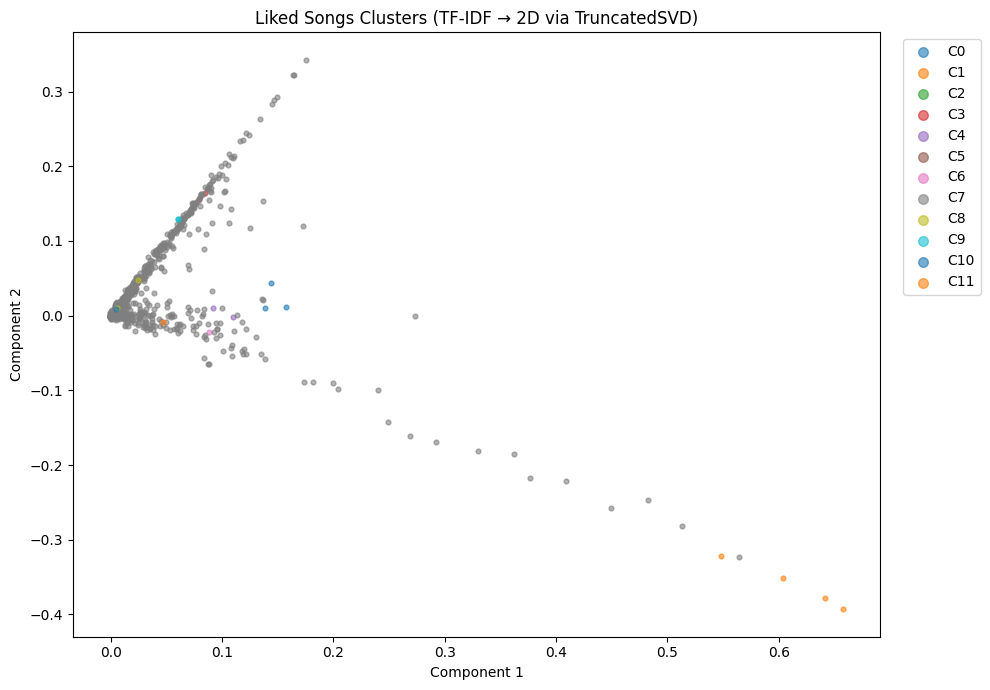

In [104]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans

# If you already have df["cluster"] from before, set RECOMPUTE_CLUSTER = False
RECOMPUTE_CLUSTER = ("cluster" not in df.columns)

text = (df["track_name"].fillna("") + " " + df["artist_names"].fillna("")).astype(str)

vec = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = vec.fit_transform(text)

if RECOMPUTE_CLUSTER:
    k = 12
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    df["cluster"] = km.fit_predict(X)

# 2D projection for plotting
svd = TruncatedSVD(n_components=2, random_state=42)
X2 = svd.fit_transform(X)

df["x"] = X2[:, 0]
df["y"] = X2[:, 1]

plt.figure(figsize=(10, 7))

# Plot each cluster separately (no manual colors; matplotlib will cycle defaults)
for c in sorted(df["cluster"].unique()):
    sub = df[df["cluster"] == c]
    plt.scatter(sub["x"], sub["y"], s=12, alpha=0.6, label=f"C{c}")

plt.title("Liked Songs Clusters (TF-IDF → 2D via TruncatedSVD)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(markerscale=2, bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


Rows with full audio features: 853


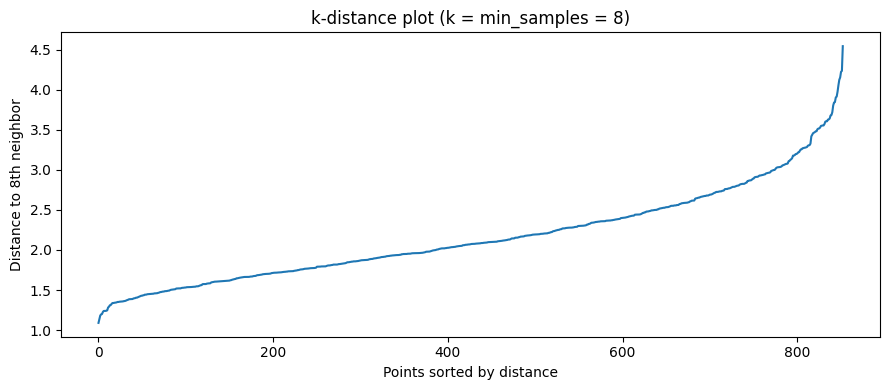

DBSCAN params: eps=0.9, min_samples=8
Clusters found: 0
Outliers (-1): 853

Cluster sizes (top 15):
cluster_db
-1    853
Name: count, dtype: int64


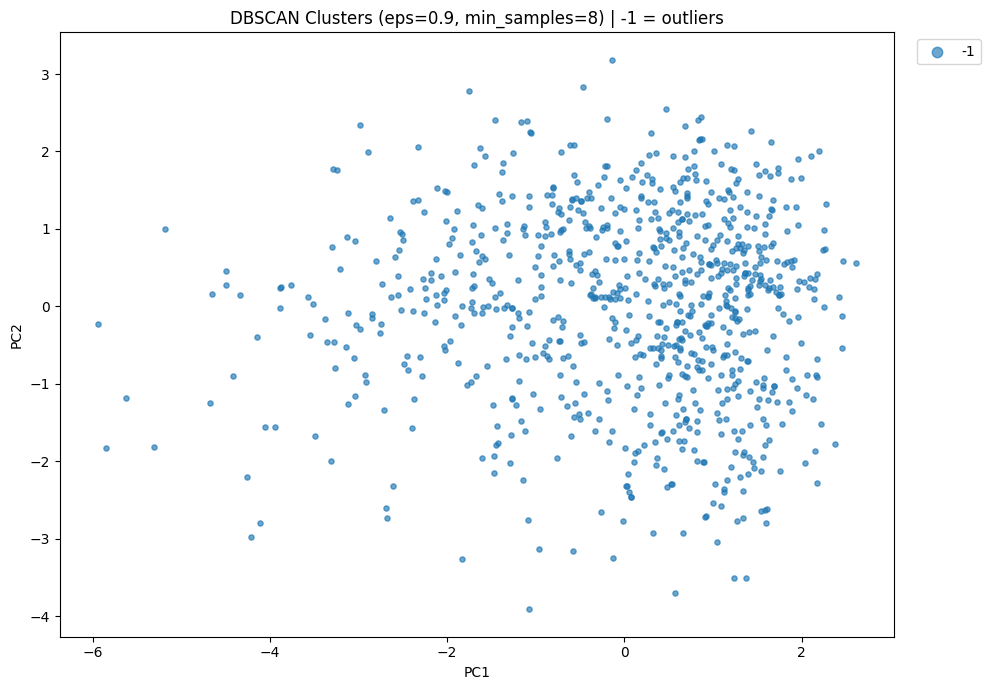


Cluster feature means (including outliers):


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key,mode
cluster_db,,,,,,,,,,,
-1,0.262,0.62,0.671,0.169,0.182,-8.158,0.072,120.193,0.534,5.28,0.39



Cluster -1 | n=853


,track_name,artist_names,tempo
0,LET THE WORLD BURN,Chris Grey,92.890
1,Disparate Youth,Santigold,152.005
2,PTSD,Nemzzz,149.916
4,TOXIC (with Skepta),Playboi Carti|Skepta,142.000
5,Remember (with Nigo),Pop Smoke|Nigo,134.950
6,the less i know the better,Ahura Mazda,85.633
7,Borderline - Version Three // Slowed Down,yahya,86.904
10,Far From Lies,Unclekamo,107.969
11,Six Days,DJ Shadow,167.259
12,Careless Whisper (Tonight The Music Seems so L...,George Michael|sped up + slowed,133.276


In [111]:
# --- DBSCAN clustering for Spotify liked songs using ReccoBeats audio features ---
# Assumes you already have:
#   df_audio = your liked songs dataframe merged with audio features columns
# If not, you can still run this once df_audio exists.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA


# 1) Choose audio feature columns (edit as needed)
feature_cols = [
    "acousticness",
    "danceability",
    "energy",
    "instrumentalness",
    "liveness",
    "loudness",
    "speechiness",
    "tempo",
    "valence",
    "key",
    "mode",
]

# 2) Filter to rows with all features available
Xdf = df_audio.dropna(subset=feature_cols).copy()

# Optional: remove obviously bad values if they exist (rare, but safe)
# for col in feature_cols:
#     Xdf = Xdf[np.isfinite(Xdf[col])]

print("Rows with full audio features:", Xdf.shape[0])

# 3) Scale features (DBSCAN is distance-based -> scaling is important)
scaler = StandardScaler()
X = scaler.fit_transform(Xdf[feature_cols].values)

# 4) Use k-distance plot to pick eps
min_samples = 8  # tune 6–12

nn = NearestNeighbors(n_neighbors=min_samples)
nn.fit(X)

distances, _ = nn.kneighbors(X)
k_dist = np.sort(distances[:, -1])  # distance to kth neighbor

plt.figure(figsize=(9, 4))
plt.plot(k_dist)
plt.title(f"k-distance plot (k = min_samples = {min_samples})")
plt.xlabel("Points sorted by distance")
plt.ylabel(f"Distance to {min_samples}th neighbor")
plt.tight_layout()
plt.show()

# 5) Run DBSCAN (set eps based on the elbow in the plot)
eps = 0.9  # <-- change this after inspecting the k-distance plot

db = DBSCAN(eps=eps, min_samples=min_samples)
labels = db.fit_predict(X)

Xdf["cluster_db"] = labels

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_outliers = int((labels == -1).sum())

print(f"DBSCAN params: eps={eps}, min_samples={min_samples}")
print("Clusters found:", n_clusters)
print("Outliers (-1):", n_outliers)
print("\nCluster sizes (top 15):")
print(Xdf["cluster_db"].value_counts().head(15))

# 6) Project to 2D for plotting (PCA)
pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(X)

Xdf["x"] = X2[:, 0]
Xdf["y"] = X2[:, 1]

plt.figure(figsize=(10, 7))
for c in sorted(Xdf["cluster_db"].unique()):
    sub = Xdf[Xdf["cluster_db"] == c]
    plt.scatter(sub["x"], sub["y"], s=14, alpha=0.65, label=f"{c}")

plt.title(f"DBSCAN Clusters (eps={eps}, min_samples={min_samples}) | -1 = outliers")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(markerscale=2, bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

# 7) Inspect each cluster: show a few example songs + feature averages
print("\nCluster feature means (including outliers):")
cluster_means = Xdf.groupby("cluster_db")[feature_cols].mean().round(3)
display(cluster_means)

for c in sorted(Xdf["cluster_db"].unique()):
    print(f"\nCluster {c} | n={(Xdf['cluster_db'] == c).sum()}")
    display(
        Xdf.loc[Xdf["cluster_db"] == c,
                ["track_name", "artist_names", "tempo",]]
        .head(12)
    )

# 8) Optional: Save clustered dataset for later use
# Xdf.to_parquet("data/processed/liked_songs_with_dbscan_clusters.parquet", index=False)


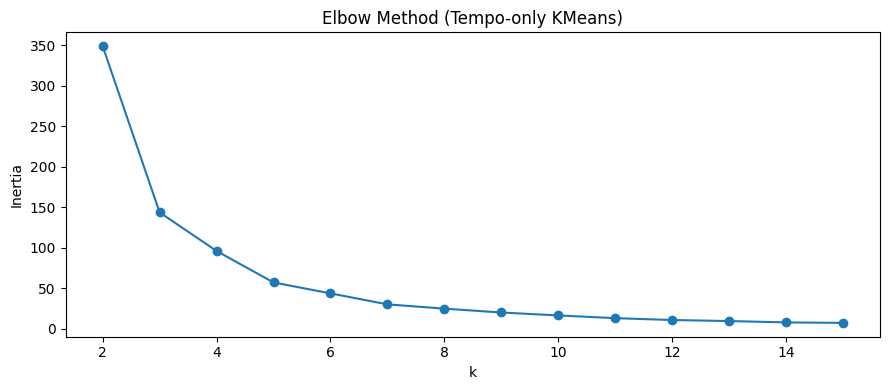

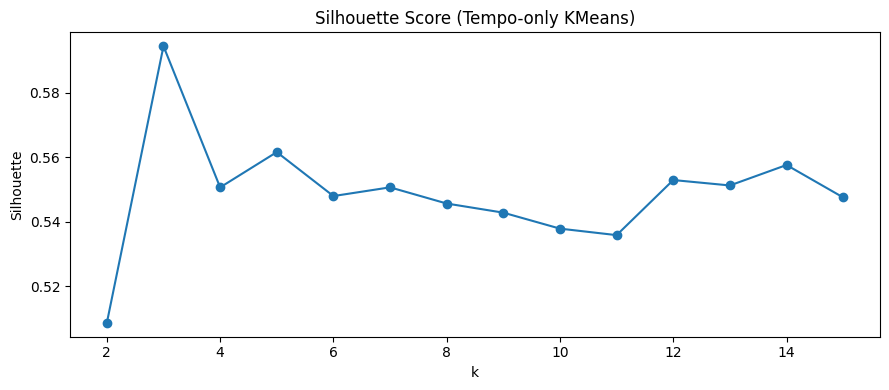

Best k by silhouette: 3


,count,min,median,mean,max
tempo_cluster,,,,,
2,281,62.60,95.05,93.64,109.06
0,442,109.77,124.86,124.97,143.00
1,130,143.48,157.52,161.34,204.80


In [112]:
# KMeans clustering on TEMPO only (1D)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1) Keep rows with tempo
Xdf = df_audio.dropna(subset=["tempo"]).copy()

# 2) Scale tempo (important for KMeans, even though it's 1D)
scaler = StandardScaler()
X = scaler.fit_transform(Xdf[["tempo"]].values)

# 3) (Optional) choose k with elbow + silhouette
inertias = []
sil_scores = []

from sklearn.metrics import silhouette_score

K_RANGE = range(2, 16)
for k in K_RANGE:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = km.fit_predict(X)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X, labels))

plt.figure(figsize=(9,4))
plt.plot(list(K_RANGE), inertias, marker="o")
plt.title("Elbow Method (Tempo-only KMeans)")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.tight_layout()
plt.show()

plt.figure(figsize=(9,4))
plt.plot(list(K_RANGE), sil_scores, marker="o")
plt.title("Silhouette Score (Tempo-only KMeans)")
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.tight_layout()
plt.show()

best_k = list(K_RANGE)[int(np.argmax(sil_scores))]
print("Best k by silhouette:", best_k)

# 4) Fit final model (use best_k or set your own)
k = best_k  # or set manually, e.g., k=6
km = KMeans(n_clusters=k, random_state=42, n_init="auto")
Xdf["tempo_cluster"] = km.fit_predict(X)

# 5) Cluster summary: tempo bands
summary = (
    Xdf.groupby("tempo_cluster")["tempo"]
       .agg(["count","min","median","mean","max"])
       .sort_values("mean")
       .round(2)
)
summary


In [113]:
# Show example songs from each tempo cluster
for c in summary.index:
    print(f"\nTempo cluster {c} | n={int(summary.loc[c,'count'])} | mean={summary.loc[c,'mean']}")
    display(
        Xdf.loc[Xdf["tempo_cluster"] == c, ["track_name","artist_names","tempo","energy","danceability","valence"]]
          .sort_values("tempo")
          .head(10)
    )



Tempo cluster 2 | n=281 | mean=93.64


,track_name,artist_names,tempo,energy,danceability,valence
840,Chra Nemiraghassy,Viguen,62.601,0.363,0.678,0.6270
29,Se iludiu com o balanço do negro,MESTRE PEPEU|NATALIA DE OLIVEIRA,67.289,0.807,0.454,0.6900
836,Axion Estin / Аксион естин,Divna Ljubojevic,68.933,0.240,0.269,0.1790
405,Batuk Bhairav Stotram Mantra,Sunil Dutt Chaturvedi|Vikas Dutt Chaturvedi,69.877,0.483,0.531,0.6630
202,Beautiful Garden,Agony dsbm,70.957,0.843,0.186,0.0986
549,Allo,Balti,71.134,0.646,0.378,0.6530
324,My Own Summer (Shove It),Deftones,71.841,0.781,0.443,0.3720
472,Yeh Vaada Raha - Tu Tu Hai Wahi / From “Yeh Va...,Kishore Kumar|Asha Bhosle|R. D. Burman,72.520,0.650,0.540,0.6350
594,Do Lafzon Ki Hai Dil Ki Kahani,Amitabh Bachchan|Asha Bhosle|Sharad Kumar,72.789,0.433,0.374,0.1860
981,Cry Me a River,Justin Timberlake,73.898,0.654,0.624,0.5640



Tempo cluster 0 | n=442 | mean=124.97


,track_name,artist_names,tempo,energy,danceability,valence
853,Bahuneh,Hayedeh,109.767,0.455,0.364,0.322
61,Test & Recognise (Flume Re-work),Seekae|Flume,109.769,0.581,0.543,0.299
952,"ADIOS, TORNADO'S EFFECT",Varnish La Piscine,109.920,0.690,0.918,0.930
293,Nawazish,Auj,109.928,0.495,0.573,0.107
396,Has Ke Uthe Has Ke Mata,Yuvraj Pandit Ji,109.983,0.901,0.749,0.391
714,Teri Meri Kahaani,Palak Muchhal|Manoj Yadav|Arijit Singh,109.986,0.801,0.602,0.347
607,Halla Re,Salim–Sulaiman|Shweta Pandit|Salim Merchant|Ro...,109.992,0.889,0.704,0.762
705,Piledriver Waltz,Arctic Monkeys,110.008,0.865,0.443,0.474
92,Danza Marilù (feat. Fabiana Martone),L'Impératrice|Fabiana Martone,110.013,0.715,0.801,0.937
220,Eternal,VIQ,110.014,0.668,0.621,0.251



Tempo cluster 1 | n=130 | mean=161.34


,track_name,artist_names,tempo,energy,danceability,valence
876,That's All,Miki Matsubara,143.480,0.442,0.500,0.519
762,Only in My Dreams,The Marías,143.921,0.496,0.518,0.281
195,Meera,Prem Joshua & Band,143.998,0.572,0.597,0.687
790,Kasvetli Kutlama,She Past Away,144.016,0.923,0.488,0.570
26,Heroine,Dutch Disorder,144.044,0.916,0.693,0.723
807,Cherry Blossom,Monster Rally,144.120,0.849,0.377,0.418
654,O Mohini O Kamini,Kunal Ganjawala|Rattan Mohan Sharma,144.225,0.595,0.452,0.431
678,poster,oaf1,144.321,0.691,0.446,0.608
183,poster,oaf1,144.321,0.691,0.446,0.608
451,Mousie,Rakesh Yankaran,144.895,0.723,0.670,0.593


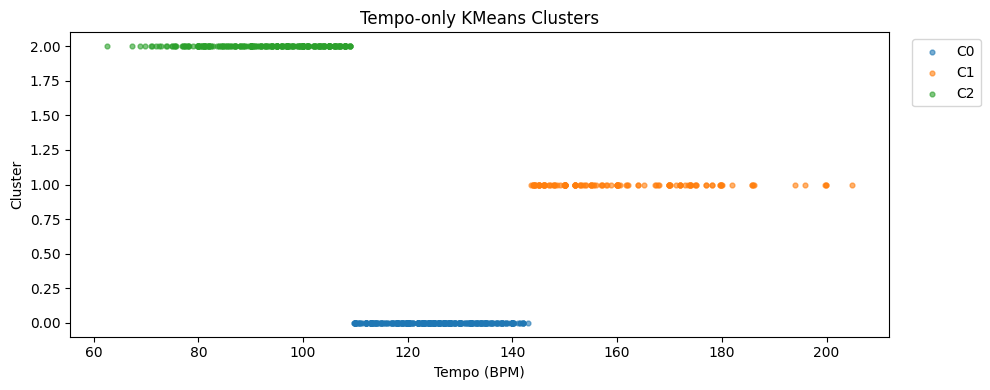

In [114]:
# Quick visualization: tempo distribution colored by cluster (1D scatter)
plt.figure(figsize=(10,4))
for c in sorted(Xdf["tempo_cluster"].unique()):
    sub = Xdf[Xdf["tempo_cluster"] == c]
    plt.scatter(sub["tempo"], np.full(len(sub), c), s=12, alpha=0.6, label=f"C{c}")

plt.title("Tempo-only KMeans Clusters")
plt.xlabel("Tempo (BPM)")
plt.ylabel("Cluster")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [115]:
# Sort clusters by mean tempo and remap to 0..k-1
means = Xdf.groupby("tempo_cluster")["tempo"].mean().sort_values()
remap = {old: new for new, old in enumerate(means.index)}
Xdf["tempo_cluster_ordered"] = Xdf["tempo_cluster"].map(remap)

# Add names
names = {0: "slow_mid", 1: "mid_fast", 2: "fast"}
Xdf["tempo_band"] = Xdf["tempo_cluster_ordered"].map(names)

Xdf.groupby("tempo_band")["tempo"].agg(["count","min","median","mean","max"]).round(2)


,count,min,median,mean,max
tempo_band,,,,,
fast,130,143.48,157.52,161.34,204.80
mid_fast,442,109.77,124.86,124.97,143.00
slow_mid,281,62.60,95.05,93.64,109.06


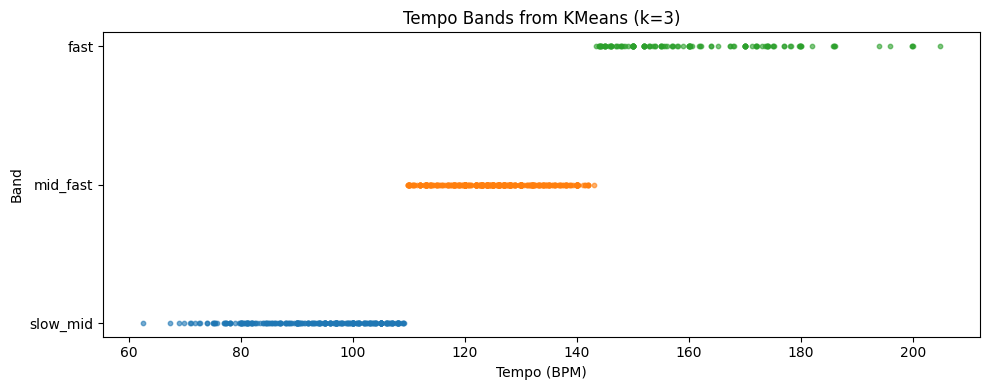

In [116]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
for band in ["slow_mid", "mid_fast", "fast"]:
    sub = Xdf[Xdf["tempo_band"] == band]
    plt.scatter(sub["tempo"], [band]*len(sub), s=10, alpha=0.6)

plt.title("Tempo Bands from KMeans (k=3)")
plt.xlabel("Tempo (BPM)")
plt.ylabel("Band")
plt.tight_layout()
plt.show()


In [117]:
for band in ["slow_mid", "mid_fast", "fast"]:
    print("\n", band, "| n =", (Xdf["tempo_band"]==band).sum())
    display(
        Xdf[Xdf["tempo_band"]==band][["track_name","artist_names","tempo","energy","danceability","valence"]]
        .sort_values("tempo")
        .head(12)
    )



 slow_mid | n = 281


,track_name,artist_names,tempo,energy,danceability,valence
840,Chra Nemiraghassy,Viguen,62.601,0.363,0.678,0.6270
29,Se iludiu com o balanço do negro,MESTRE PEPEU|NATALIA DE OLIVEIRA,67.289,0.807,0.454,0.6900
836,Axion Estin / Аксион естин,Divna Ljubojevic,68.933,0.240,0.269,0.1790
405,Batuk Bhairav Stotram Mantra,Sunil Dutt Chaturvedi|Vikas Dutt Chaturvedi,69.877,0.483,0.531,0.6630
202,Beautiful Garden,Agony dsbm,70.957,0.843,0.186,0.0986
549,Allo,Balti,71.134,0.646,0.378,0.6530
324,My Own Summer (Shove It),Deftones,71.841,0.781,0.443,0.3720
472,Yeh Vaada Raha - Tu Tu Hai Wahi / From “Yeh Va...,Kishore Kumar|Asha Bhosle|R. D. Burman,72.520,0.650,0.540,0.6350
594,Do Lafzon Ki Hai Dil Ki Kahani,Amitabh Bachchan|Asha Bhosle|Sharad Kumar,72.789,0.433,0.374,0.1860
981,Cry Me a River,Justin Timberlake,73.898,0.654,0.624,0.5640



 mid_fast | n = 442


,track_name,artist_names,tempo,energy,danceability,valence
853,Bahuneh,Hayedeh,109.767,0.455,0.364,0.322
61,Test & Recognise (Flume Re-work),Seekae|Flume,109.769,0.581,0.543,0.299
952,"ADIOS, TORNADO'S EFFECT",Varnish La Piscine,109.920,0.690,0.918,0.930
293,Nawazish,Auj,109.928,0.495,0.573,0.107
396,Has Ke Uthe Has Ke Mata,Yuvraj Pandit Ji,109.983,0.901,0.749,0.391
714,Teri Meri Kahaani,Palak Muchhal|Manoj Yadav|Arijit Singh,109.986,0.801,0.602,0.347
607,Halla Re,Salim–Sulaiman|Shweta Pandit|Salim Merchant|Ro...,109.992,0.889,0.704,0.762
705,Piledriver Waltz,Arctic Monkeys,110.008,0.865,0.443,0.474
92,Danza Marilù (feat. Fabiana Martone),L'Impératrice|Fabiana Martone,110.013,0.715,0.801,0.937
220,Eternal,VIQ,110.014,0.668,0.621,0.251



 fast | n = 130


,track_name,artist_names,tempo,energy,danceability,valence
876,That's All,Miki Matsubara,143.480,0.442,0.500,0.5190
762,Only in My Dreams,The Marías,143.921,0.496,0.518,0.2810
195,Meera,Prem Joshua & Band,143.998,0.572,0.597,0.6870
790,Kasvetli Kutlama,She Past Away,144.016,0.923,0.488,0.5700
26,Heroine,Dutch Disorder,144.044,0.916,0.693,0.7230
807,Cherry Blossom,Monster Rally,144.120,0.849,0.377,0.4180
654,O Mohini O Kamini,Kunal Ganjawala|Rattan Mohan Sharma,144.225,0.595,0.452,0.4310
678,poster,oaf1,144.321,0.691,0.446,0.6080
183,poster,oaf1,144.321,0.691,0.446,0.6080
451,Mousie,Rakesh Yankaran,144.895,0.723,0.670,0.5930


Best k: 3 silhouette: 0.3759501376271415


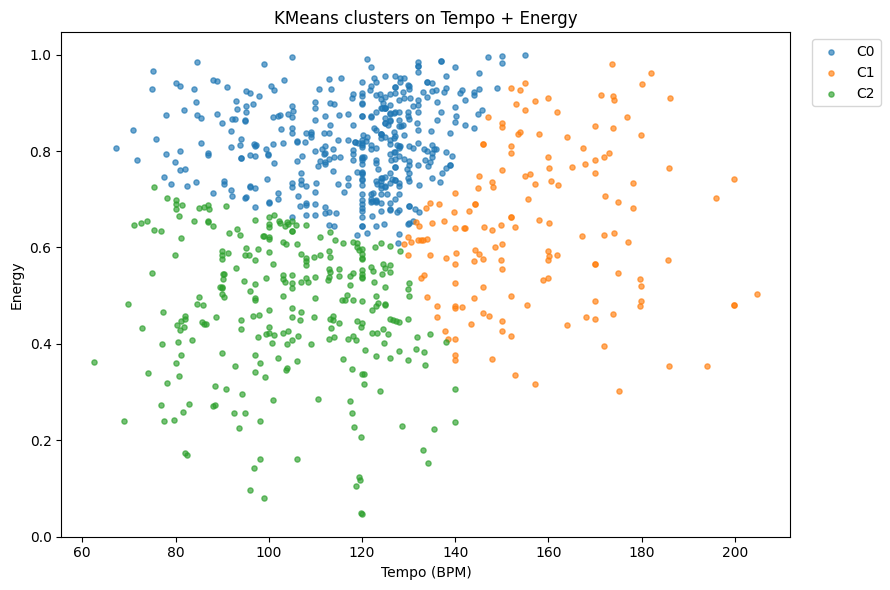

In [118]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

cols = ["tempo", "energy"]  # swap energy for danceability/valence if you want
Xdf2 = df_audio.dropna(subset=cols).copy()

X = StandardScaler().fit_transform(Xdf2[cols].values)

K_RANGE = range(2, 16)
sil = []
for k in K_RANGE:
    labels = KMeans(n_clusters=k, random_state=42, n_init="auto").fit_predict(X)
    sil.append(silhouette_score(X, labels))

best_k = list(K_RANGE)[int(np.argmax(sil))]
print("Best k:", best_k, "silhouette:", max(sil))

k = best_k  # or pick manually
km = KMeans(n_clusters=k, random_state=42, n_init="auto")
Xdf2["cluster_te"] = km.fit_predict(X)

# plot in the real feature space (2D!)
plt.figure(figsize=(9,6))
for c in sorted(Xdf2["cluster_te"].unique()):
    sub = Xdf2[Xdf2["cluster_te"] == c]
    plt.scatter(sub["tempo"], sub["energy"], s=14, alpha=0.65, label=f"C{c}")

plt.title("KMeans clusters on Tempo + Energy")
plt.xlabel("Tempo (BPM)")
plt.ylabel("Energy")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [119]:
summary = (
    Xdf2.groupby("cluster_te")[["tempo","energy","danceability","valence"]]
        .mean()
        .round(3)
        .sort_values("tempo")
)
summary


,tempo,energy,danceability,valence
cluster_te,,,,
2,104.359,0.473,0.617,0.494
0,117.337,0.817,0.642,0.569
1,156.251,0.644,0.566,0.512


In [120]:
for c in sorted(Xdf2["cluster_te"].unique()):
    print(f"\nCluster {c} | n={(Xdf2['cluster_te']==c).sum()}")
    display(Xdf2[Xdf2["cluster_te"]==c][["track_name","artist_names","tempo","energy","danceability","valence"]].head(10))



Cluster 0 | n=413


,track_name,artist_names,tempo,energy,danceability,valence
5,Remember (with Nigo),Pop Smoke|Nigo,134.950,0.744,0.685,0.167
16,Some Nights,Class Fools,126.996,0.768,0.883,0.702
17,Da Fonk (feat. Joni),Mochakk|Joni,127.007,0.798,0.776,0.428
18,I Follow Rivers - The Magician Remix,Lykke Li|The Magician,122.031,0.700,0.785,0.296
22,Hailin From The Edge,Apparat|Raz Ohara,92.020,0.706,0.816,0.525
23,Meet Her At The Love Parade - Slowed,Vieze Asbak,113.048,0.900,0.934,0.713
26,Heroine,Dutch Disorder,144.044,0.916,0.693,0.723
27,Youngest Daughter,Superheaven,129.682,0.762,0.492,0.413
29,Se iludiu com o balanço do negro,MESTRE PEPEU|NATALIA DE OLIVEIRA,67.289,0.807,0.454,0.690
42,"Aoi, Koi, Daidaiiro No Hi",MASS OF THE FERMENTING DREGS,149.039,0.932,0.450,0.279



Cluster 1 | n=157


,track_name,artist_names,tempo,energy,danceability,valence
1,Disparate Youth,Santigold,152.005,0.931,0.642,0.548
2,PTSD,Nemzzz,149.916,0.647,0.801,0.635
4,TOXIC (with Skepta),Playboi Carti|Skepta,142.000,0.640,0.855,0.432
11,Six Days,DJ Shadow,167.259,0.624,0.524,0.738
12,Careless Whisper (Tonight The Music Seems so L...,George Michael|sped up + slowed,133.276,0.543,0.631,0.569
36,Take Me To The Sun,d4vd,178.182,0.734,0.446,0.545
39,Tu Mile Dil Khile - Male Vocals,Kumar Sanu|Indeevar,185.847,0.354,0.609,0.595
43,Gali Gali Mein,Manhar Udhas|Alka Yagnik,131.506,0.653,0.523,0.522
47,That's That,Sheff G,140.091,0.589,0.690,0.652
51,Relax My Eyes,ANOTR|Abel Balder,131.975,0.616,0.747,0.908



Cluster 2 | n=283


,track_name,artist_names,tempo,energy,danceability,valence
0,LET THE WORLD BURN,Chris Grey,92.890,0.557,0.377,0.2480
6,the less i know the better,Ahura Mazda,85.633,0.445,0.448,0.7470
7,Borderline - Version Three // Slowed Down,yahya,86.904,0.654,0.587,0.3040
10,Far From Lies,Unclekamo,107.969,0.564,0.736,0.7180
13,starly - Slowed,LONOWN|riserayss,91.504,0.631,0.699,0.1680
14,Finesse,Michael Prince|Koncept P|willnosleep|avonosleep,133.010,0.179,0.804,0.0959
15,Song for Denise,Piano Fantasia,102.414,0.650,0.797,0.9540
20,auditorium - slowed + reverb,bbygirl,80.665,0.334,0.578,0.1970
24,Let's Go,Key Glock,75.486,0.636,0.654,0.2670
28,fly sht,Destroy Lonely,128.098,0.592,0.797,0.4250
